In [11]:
import nltk
# from nltk.book import *
from nltk.stem.porter import *
from nltk.stem import * 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import RegexpTokenizer #regular expression tokenizer
from nltk import FreqDist

import re  # regular expression 

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

import random
import string # to process standard python strings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd

import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer #for Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer # for Term Frequency Inverse Document Frequency



In [12]:
pwd()

'C:\\Users\\Bayd-Brisht\\Desktop\\Final Semester\\NLP\\Jupyter Notebooks'

In [13]:

dataset = pd.read_csv('Iris.csv')

# encoding is used when the text contains non-English characters such as emojis



FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [4]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
x = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values


x

NameError: name 'dataset' is not defined

## Splitting dataset into training and testing set

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) # 80% training - 20% testing

NameError: name 'x' is not defined

## Data standardization, or Feature scaling 

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

NameError: name 'x_train' is not defined

## Training the Naïve Bayes Classification model on the training set.

In [9]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB


classifier = GaussianNB()
# classifier = MultinomialNB()

classifier.fit(x_train, y_train)

GaussianNB()

## Predicting test set results

In [10]:
y_pred = classifier.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa'], dtype='<U15')

## Accuracy and Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred) # true labels vs predicted labels

print("Prediction Accuracy is: ", accuracy_score(y_test, y_pred))
cm

Prediction Accuracy is:  0.9666666666666667


array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]])

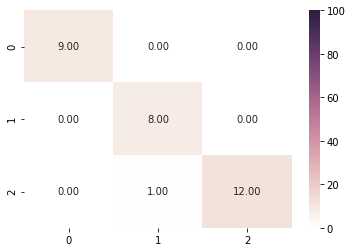

In [12]:
import seaborn as sn

cmap = sn.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
